## 数据集Dataloader制作

### 如何自定义数据集：

- 1.数据和标签的目录结构先搞定(得知道到哪读数据)
- 2.写好读取数据和标签路径的函数(根据自己数据集情况来写)
- 3.完成单个数据与标签读取函数(给dataloader举一个例子)

### 花朵数据集为例：

- 原来数据集都是以文件夹为类别ID，换一个套路，用txt文件指定数据路径与标签
- 任务就是在txt文件中获取图像路径与标签，然后把他们交给dataloader
- 按照对应格式传递需要的数据和标签就可以啦

In [15]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch
from torch import nn
import torch.optim as optim
import torchvision
#pip install torchvision
from torchvision import transforms, models, datasets
#https://pytorch.org/docs/stable/torchvision/index.html
import imageio
import time
import warnings
import random
import sys
import copy
import json
from PIL import Image

## 先来分细节明白做什么！

#### 任务1：读取txt文件中的路径和标签

- 第一个小任务，从标注文件中(train.txt)读取数据和标签

In [16]:
def load_annotations(ann_file):
    data_infos = {}
    with open(ann_file) as f:
        samples = [x.strip().split(' ') for x in f.readlines()]
        for filename, gt_label in samples:
            data_infos[filename] = np.array(gt_label, dtype=np.int64)
    return data_infos

In [17]:
print(load_annotations('./flower_data/train.txt'))

{'image_06734.jpg': array(0), 'image_06735.jpg': array(0), 'image_06736.jpg': array(0), 'image_06737.jpg': array(0), 'image_06738.jpg': array(0), 'image_06740.jpg': array(0), 'image_06741.jpg': array(0), 'image_06742.jpg': array(0), 'image_06744.jpg': array(0), 'image_06745.jpg': array(0), 'image_06746.jpg': array(0), 'image_06747.jpg': array(0), 'image_06748.jpg': array(0), 'image_06750.jpg': array(0), 'image_06751.jpg': array(0), 'image_06753.jpg': array(0), 'image_06757.jpg': array(0), 'image_06759.jpg': array(0), 'image_06761.jpg': array(0), 'image_06762.jpg': array(0), 'image_06766.jpg': array(0), 'image_06767.jpg': array(0), 'image_06768.jpg': array(0), 'image_06770.jpg': array(0), 'image_06771.jpg': array(0), 'image_06772.jpg': array(0), 'image_06773.jpg': array(0), 'image_07086.jpg': array(9), 'image_07087.jpg': array(9), 'image_07088.jpg': array(9), 'image_07089.jpg': array(9), 'image_07091.jpg': array(9), 'image_07092.jpg': array(9), 'image_07093.jpg': array(9), 'image_07095.

#### 任务2：分别把数据和标签都存在list里

- 因为dataloader到时候会在这里取数据

In [18]:
img_label = load_annotations('./flower_data/train.txt')

In [19]:
image_name = list(img_label.keys())
label = list(img_label.values())

In [20]:
image_name

['image_06734.jpg',
 'image_06735.jpg',
 'image_06736.jpg',
 'image_06737.jpg',
 'image_06738.jpg',
 'image_06740.jpg',
 'image_06741.jpg',
 'image_06742.jpg',
 'image_06744.jpg',
 'image_06745.jpg',
 'image_06746.jpg',
 'image_06747.jpg',
 'image_06748.jpg',
 'image_06750.jpg',
 'image_06751.jpg',
 'image_06753.jpg',
 'image_06757.jpg',
 'image_06759.jpg',
 'image_06761.jpg',
 'image_06762.jpg',
 'image_06766.jpg',
 'image_06767.jpg',
 'image_06768.jpg',
 'image_06770.jpg',
 'image_06771.jpg',
 'image_06772.jpg',
 'image_06773.jpg',
 'image_07086.jpg',
 'image_07087.jpg',
 'image_07088.jpg',
 'image_07089.jpg',
 'image_07091.jpg',
 'image_07092.jpg',
 'image_07093.jpg',
 'image_07095.jpg',
 'image_07096.jpg',
 'image_07097.jpg',
 'image_07098.jpg',
 'image_07099.jpg',
 'image_07100.jpg',
 'image_07103.jpg',
 'image_07105.jpg',
 'image_07106.jpg',
 'image_07108.jpg',
 'image_07109.jpg',
 'image_07110.jpg',
 'image_07111.jpg',
 'image_07112.jpg',
 'image_07113.jpg',
 'image_07114.jpg',


In [21]:
label

[array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(0),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(9),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99),
 array(99

#### 任务3：图像数据路径得完整

- 因为一会咱得用这个路径去读数据，所以路径得加上前缀
- 以后大家任务不同，数据不同，怎么加你看着来就行，反正得能读到图像

In [22]:
data_dir = './flower_data/'
train_dir = data_dir + '/train_filelist'
valid_dir = data_dir + '/val_filelist'

In [23]:
image_path = [os.path.join(train_dir,img) for img in image_name]
image_path

['./flower_data//train_filelist/image_06734.jpg',
 './flower_data//train_filelist/image_06735.jpg',
 './flower_data//train_filelist/image_06736.jpg',
 './flower_data//train_filelist/image_06737.jpg',
 './flower_data//train_filelist/image_06738.jpg',
 './flower_data//train_filelist/image_06740.jpg',
 './flower_data//train_filelist/image_06741.jpg',
 './flower_data//train_filelist/image_06742.jpg',
 './flower_data//train_filelist/image_06744.jpg',
 './flower_data//train_filelist/image_06745.jpg',
 './flower_data//train_filelist/image_06746.jpg',
 './flower_data//train_filelist/image_06747.jpg',
 './flower_data//train_filelist/image_06748.jpg',
 './flower_data//train_filelist/image_06750.jpg',
 './flower_data//train_filelist/image_06751.jpg',
 './flower_data//train_filelist/image_06753.jpg',
 './flower_data//train_filelist/image_06757.jpg',
 './flower_data//train_filelist/image_06759.jpg',
 './flower_data//train_filelist/image_06761.jpg',
 './flower_data//train_filelist/image_06762.jpg',


#### 任务4：把上面那几个事得写在一起

- 1.注意要使用from torch.utils.data import Dataset, DataLoader
- 2.类名定义class FlowerDataset(Dataset)，其中FlowerDataset可以改成自己的名字
- 3.def __init__(self, root_dir, ann_file, transform=None):要根据自己任务重写
- 4.def __getitem__(self, idx):根据自己任务，返回图像数据和标签数据

In [24]:
from torch.utils.data import Dataset, DataLoader
class FlowerDataset(Dataset):
    def __init__(self, root_dir, ann_file, transform=None):
        self.ann_file = ann_file
        self.root_dir = root_dir
        self.img_label = self.load_annotations()
        self.img = [os.path.join(self.root_dir,img) for img in list(self.img_label.keys())]
        self.label = [label for label in list(self.img_label.values())]
        self.transform = transform
 
    def __len__(self):
        return len(self.img)
 
    def __getitem__(self, idx):
        image = Image.open(self.img[idx])
        label = self.label[idx]
        if self.transform:
            image = self.transform(image)
        label = torch.from_numpy(np.array(label))
        return image, label
    def load_annotations(self):
        data_infos = {}
        with open(self.ann_file) as f:
            samples = [x.strip().split(' ') for x in f.readlines()]
            for filename, gt_label in samples:
                data_infos[filename] = np.array(gt_label, dtype=np.int64)
        return data_infos

#### 任务5：数据预处理(transform)

- 1.预处理的事都在上面的__getitem__中完成，需要对图像和标签进行转换,
- 2.返回的数据和标签就是建模时模型的输入和损失函数中标签的输入，一定整明白自己模型里需要什么
- 3.预处理这个事是你定的，不同的数据需要的方法也不一样，下面给出的是比较通用的方法

In [25]:
data_transforms = {
    'train': 
        transforms.Compose([
        transforms.Resize(64),
        transforms.RandomRotation(45),#随机旋转，-45到45度之间随机选
        transforms.CenterCrop(64),#从中心开始裁剪
        transforms.RandomHorizontalFlip(p=0.5),#随机水平翻转 选择一个概率概率
        transforms.RandomVerticalFlip(p=0.5),#随机垂直翻转
        transforms.ColorJitter(brightness=0.2, contrast=0.1, saturation=0.1, hue=0.1),#参数1为亮度，参数2为对比度，参数3为饱和度，参数4为色相
        transforms.RandomGrayscale(p=0.025),#概率转换成灰度率，3通道就是R=G=B
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])#均值，标准差
    ]),
    'valid': 
        transforms.Compose([
        transforms.Resize(64),
        transforms.CenterCrop(64),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

#### 任务6：根据写好的class FlowerDataset(Dataset):来实例化我们的dataloader

- 1.构建数据集：分别创建训练和验证用的数据集（如果需要测试集也一样的方法）
- 2.用Torch给的DataLoader方法来实例化(batch多少自己定，根据你的显存来选合适的)

In [26]:
train_dataset = FlowerDataset(root_dir=train_dir, ann_file = './flower_data/train.txt', transform=data_transforms['train'])

In [27]:
val_dataset = FlowerDataset(root_dir=valid_dir, ann_file = './flower_data/val.txt', transform=data_transforms['valid'])

In [28]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)

In [29]:
len(train_dataset)

6552

In [30]:
len(val_dataset)

818

#### 任务7：用之前先试试，整个数据和标签对应下，看看对不对

- 1.先测试一下转换是否成功
- 2.用这个方法：iter(train_loader).next()来试试，得到的数据和标签是啥
- 3.看不出来就把图画出来，标签打印出来，确保自己做出的数据集没啥问题

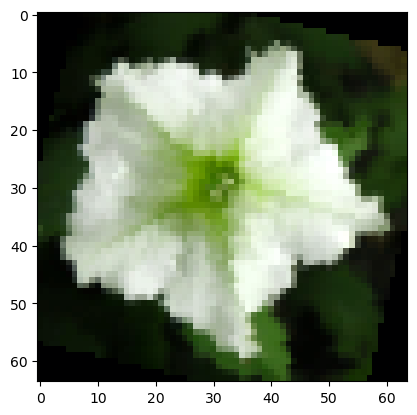

Label is: 50


In [43]:
train_iter = iter(train_loader)
image, label = next(train_iter)
sample = image[0].squeeze()
sample = sample.permute((1, 2, 0)).numpy()
sample *= [0.229, 0.224, 0.225]
sample += [0.485, 0.456, 0.406]
plt.imshow(sample)
plt.show()
print('Label is: {}'.format(label[0].numpy()))


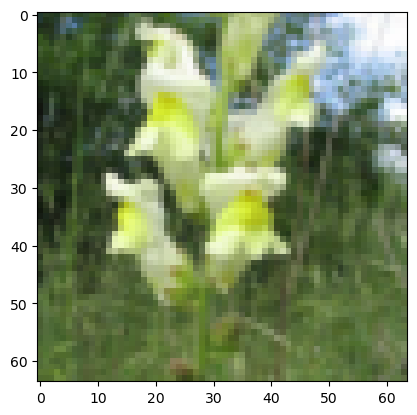

Label is: 10


In [44]:
val_iter = iter(val_loader)
image, label = next(val_iter)
sample = image[0].squeeze()
sample = sample.permute((1, 2, 0)).numpy()
sample *= [0.229, 0.224, 0.225]
sample += [0.485, 0.456, 0.406]
plt.imshow(sample)
plt.show()
print('Label is: {}'.format(label[0].numpy()))

#### 任务8：咋用就是你来定了，定义网络模型

In [35]:
dataloaders = {'train':train_loader,'valid':val_loader}

In [36]:
model_name = 'resnet'  #可选的比较多 ['resnet', 'alexnet', 'vgg', 'squeezenet', 'densenet', 'inception']
#是否用人家训练好的特征来做
feature_extract = True 

In [37]:
# 是否用GPU训练
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
    
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

CUDA is not available.  Training on CPU ...


In [38]:
model_ft = models.resnet18()
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#### 这种做法通常用于迁移学习,即利用预训练模型的卷积层作为特征提取器,然后替换全连接层以适应新的任务。
#### 通过修改全连接层的输出大小,我们可以将预训练模型应用于不同的分类问题。同时,设置输入图像的大小可以确保图像在送入模型之前已经调整为适当的尺寸。


In [39]:
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Sequential(nn.Linear(num_ftrs, 102))
input_size = 64
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [40]:
# 优化器设置
optimizer_ft = optim.Adam(model_ft.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)#学习率每7个epoch衰减成原来的1/10
criterion = nn.CrossEntropyLoss()

In [41]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=10, is_inception=False, filename='best.pth'):
    since = time.time()
    best_acc = 0
    model.to(device)  # 将模型移到GPU上
    
    val_acc_history = []  # 记录每个epoch的验证准确率
    train_acc_history = []  # 记录每个epoch的训练准确率 
    train_losses = []  # 记录每个epoch的训练损失
    valid_losses = []  # 记录每个epoch的验证损失
    LRs = [optimizer.param_groups[0]['lr']]  # 记录每个epoch的学习率
    
    best_model_wts = copy.deepcopy(model.state_dict())  # 深拷贝模型的状态字典,用于保存最佳模型
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
    
        # 每个epoch都有训练和验证两个阶段
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # 设置模型为训练模式
            else:
                model.eval()   # 设置模型为验证模式
    
            running_loss = 0.0  # 初始化运行损失
            running_corrects = 0  # 初始化运行准确数
    
            # 遍历数据加载器获取数据
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)  # 将输入数据移到GPU上
                labels = labels.to(device)  # 将标签移到GPU上
    
                optimizer.zero_grad()  # 清空优化器梯度
                
                # 只在训练阶段计算和更新梯度
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)  # 前向传播,获取输出
                    loss = criterion(outputs, labels)  # 计算损失
                    _, preds = torch.max(outputs, 1)  # 获取预测结果
    
                    # 如果是训练阶段,执行反向传播和优化
                    if phase == 'train':
                        loss.backward()  # 反向传播计算梯度
                        optimizer.step()  # 更新模型参数
    
                # 统计损失和准确数
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
    
            epoch_loss = running_loss / len(dataloaders[phase].dataset)  # 计算每个epoch的平均损失
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)  # 计算每个epoch的准确率
            
            time_elapsed = time.time() - since
            print('Time elapsed {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
                       
            # 如果是验证阶段,且准确率优于之前的最佳准确率,保存当前模型为最佳模型
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                state = {
                  'state_dict': model.state_dict(),  # 模型的状态字典
                  'best_acc': best_acc,  # 最佳准确率
                  'optimizer' : optimizer.state_dict(),  # 优化器的状态字典
                }
                torch.save(state, filename)  # 保存最佳模型
                
            if phase == 'valid':
                val_acc_history.append(epoch_acc)  # 记录验证准确率
                valid_losses.append(epoch_loss)  # 记录验证损失
                scheduler.step(epoch_loss)  # 学习率调度,根据验证损失调整学习率
                
            if phase == 'train':
                train_acc_history.append(epoch_acc)  # 记录训练准确率  
                train_losses.append(epoch_loss)  # 记录训练损失
        
        print('Optimizer learning rate : {:.7f}'.format(optimizer.param_groups[0]['lr']))
        LRs.append(optimizer.param_groups[0]['lr'])  # 记录当前学习率
        print()
    
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))  
    print('Best val Acc: {:4f}'.format(best_acc))
    
    # 训练结束后用最佳模型的参数更新当前模型
    model.load_state_dict(best_model_wts)
    
    # 返回训练好的模型、验证准确率历史、训练准确率历史、验证损失历史、训练损失历史、学习率历史
    return model, val_acc_history, train_acc_history, valid_losses, train_losses, LRs

In [42]:
model_ft, val_acc_history, train_acc_history, valid_losses, train_losses, LRs  = train_model(model_ft, dataloaders, criterion, optimizer_ft, num_epochs=20, filename='best.pth')

Epoch 0/19
----------
Time elapsed 2m 10s
train Loss: 4.0209 Acc: 0.0844
Time elapsed 2m 18s
valid Loss: 4.0363 Acc: 0.1222


/Users/apple/anaconda3/envs/pytorch_evn/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Optimizer learning rate : 0.0010000

Epoch 1/19
----------
Time elapsed 4m 23s
train Loss: 3.4287 Acc: 0.1645
Time elapsed 4m 31s
valid Loss: 3.3380 Acc: 0.1932
Optimizer learning rate : 0.0010000

Epoch 2/19
----------


KeyboardInterrupt: 